In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import StandardScaler
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score, accuracy_score

In [3]:
# Load the dataset
data = pd.read_csv('train.csv')
data.drop(['Candidate', 'Constituency ∇', 'ID'], axis=1, inplace=True)

# Check for NaN/missing values
print(f"Number of missing values: \n{data.isna().sum()}")

def convert_to_numeric(value):
    if pd.isna(value):
        return 0
    elif 'Crore+' in value:
        return int(value.replace(' Crore+', '')) * 10000000
    elif 'Lac+' in value:
        return int(value.replace(' Lac+', '')) * 100000
    elif 'Thou+' in value:
        return int(value.replace(' Thou+', '')) * 1000
    elif 'Hund+' in value:
        return int(value.replace(' Hund+', '')) * 100
    else:
        return int(value)

data['Total Assets'] = data['Total Assets'].apply(convert_to_numeric)
data['Liabilities'] = data['Liabilities'].apply(convert_to_numeric)



# # Feature Engineering
# Create a new feature 'net_worth'
data['net_worth'] = data['Total Assets'] - data['Liabilities']


Number of missing values: 
Party            0
Criminal Case    0
Total Assets     0
Liabilities      0
state            0
Education        0
dtype: int64


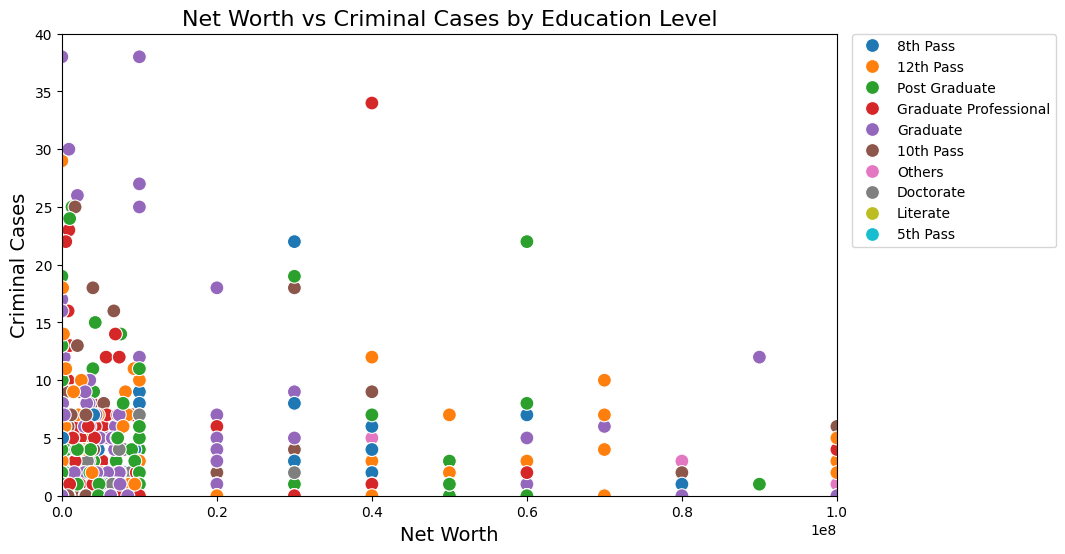

In [14]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Liabilities', y='Criminal Case', hue='Education', s=100)

# Set x and y limits
plt.xlim(0, 1e8)  # Set x-axis limits from 0 to 1
plt.ylim(0, 40)  # Set y-axis limits from 0 to 10



# Add labels and title
plt.title('Net Worth vs Criminal Cases by Education Level', fontsize=16)
plt.xlabel('Net Worth', fontsize=14)
plt.ylabel('Criminal Cases', fontsize=14)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# Show the plot
plt.show()

In [23]:
education_counts = data['Education'].value_counts()
print(education_counts)

Education
Graduate                 531
Post Graduate            432
12th Pass                349
Graduate Professional    339
10th Pass                227
8th Pass                  78
Doctorate                 52
Others                    28
Literate                  14
5th Pass                   9
Name: count, dtype: int64


In [16]:
# Get unique Education levels
education_levels = data['Education'].unique()
print("Unique Education levels:", education_levels)

Unique Education levels: ['8th Pass' '12th Pass' 'Post Graduate' 'Graduate Professional' 'Graduate'
 '10th Pass' 'Others' 'Doctorate' 'Literate' '5th Pass']


C:\Users\chinm\AppData\Local\Temp\ipykernel_23656\690737945.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_total_assets = data.groupby('Education')['Total Assets'].mean().reindex(education_order, fill_value=0)
C:\Users\chinm\AppData\Local\Temp\ipykernel_23656\690737945.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_liabilities = data.groupby('Education')['Liabilities'].mean().reindex(education_order, fill_value=0)
C:\Users\chinm\AppData\Local\Temp\ipykernel_23656\690737945.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of p

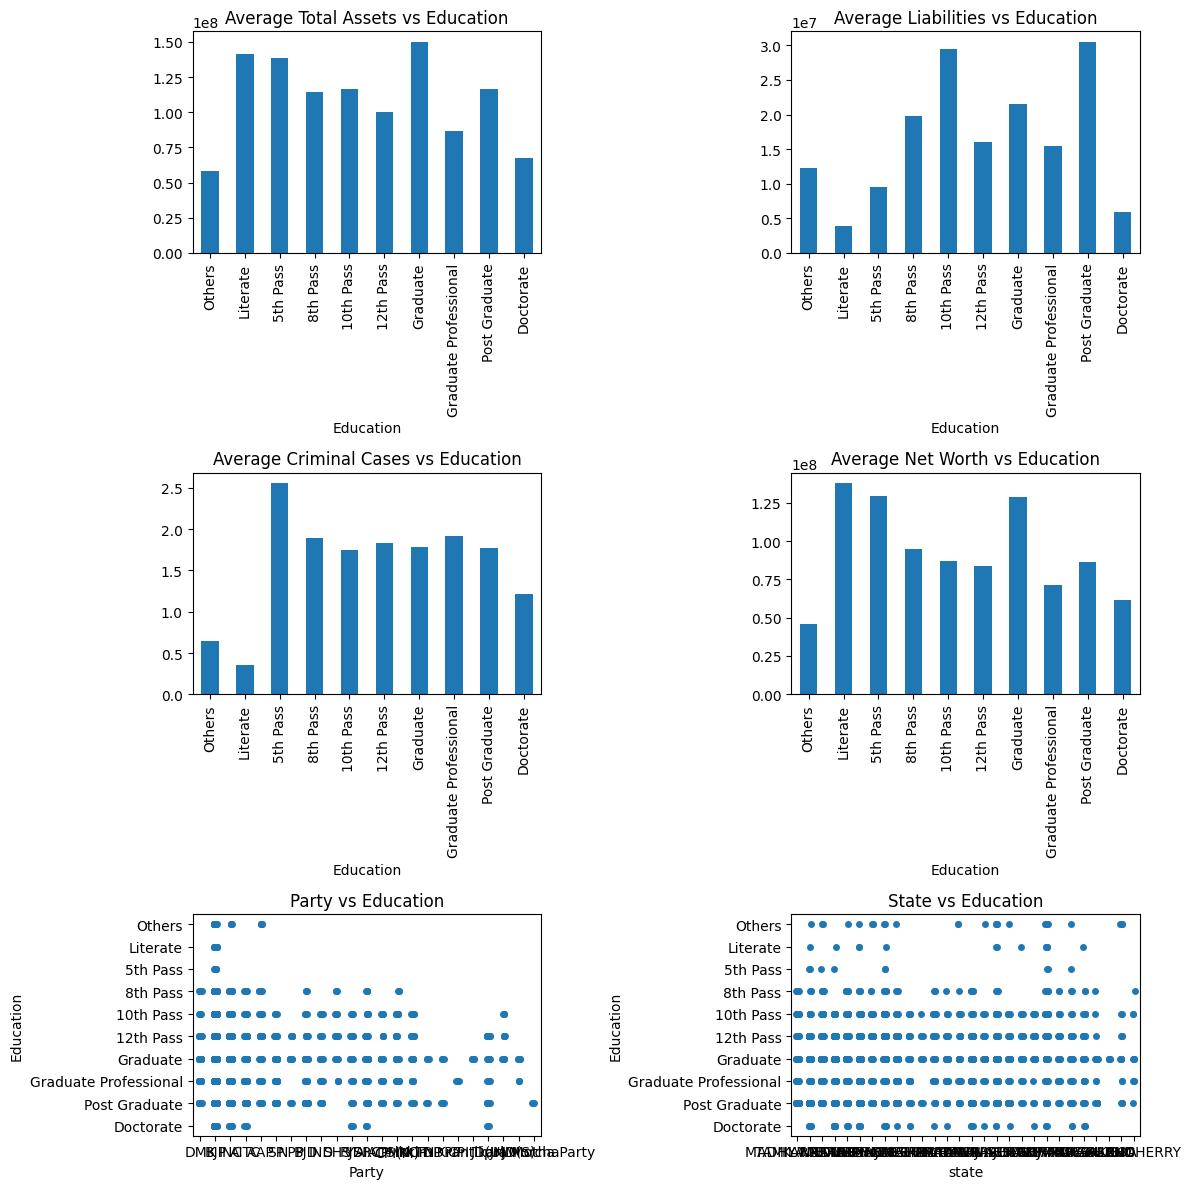

In [10]:
# Order Education levels
education_order = ['Others', 'Literate', '5th Pass', '8th Pass', '10th Pass', '12th Pass', 'Graduate', 'Graduate Professional', 'Post Graduate', 'Doctorate']
data['Education'] = pd.Categorical(data['Education'], categories=education_order, ordered=True)

# Set up the figure
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
axes = axes.flatten()

# Bar plot: Average Total Assets vs Education
avg_total_assets = data.groupby('Education')['Total Assets'].mean().reindex(education_order, fill_value=0)
avg_total_assets.plot(kind='bar', ax=axes[0])
axes[0].set_title('Average Total Assets vs Education')

# Bar plot: Average Liabilities vs Education
avg_liabilities = data.groupby('Education')['Liabilities'].mean().reindex(education_order, fill_value=0)
avg_liabilities.plot(kind='bar', ax=axes[1])
axes[1].set_title('Average Liabilities vs Education')

# Bar plot: Average Criminal Cases vs Education
avg_criminal_cases = data.groupby('Education')['Criminal Case'].mean().reindex(education_order, fill_value=0)
avg_criminal_cases.plot(kind='bar', ax=axes[2])
axes[2].set_title('Average Criminal Cases vs Education')

# Bar plot: Average Criminal Cases vs Education
avg_criminal_cases = data.groupby('Education')['net_worth'].mean().reindex(education_order, fill_value=0)
avg_criminal_cases.plot(kind='bar', ax=axes[3])
axes[3].set_title('Average Net Worth vs Education')

# Strip plot: Party vs Education
sns.stripplot(x=data['Party'], y=data['Education'], ax=axes[4])
axes[4].set_title('Party vs Education')

# Strip plot: State vs Education
sns.stripplot(x=data['state'], y=data['Education'], ax=axes[5])
axes[5].set_title('State vs Education')


plt.tight_layout()
plt.show()

In [4]:

# Separate features and target
X = data[['net_worth', 'Criminal Case', 'state']]
y = data['Education']
X = pd.get_dummies(X, columns=['state'])



In [6]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
print(X.head())

    net_worth  Criminal Case  state_ANDHRA PRADESH  state_ARUNACHAL PRADESH  \
0  2090000000              4                 False                    False   
1    10000000              0                 False                    False   
2    67800000              0                 False                    False   
3    87600000              0                 False                    False   
4    13900000              2                 False                    False   

   state_ASSAM  state_BIHAR  state_CHHATTISGARH  state_DELHI  state_GOA  \
0        False        False               False        False      False   
1        False        False               False        False      False   
2        False        False               False        False      False   
3        False         True               False        False      False   
4        False        False               False        False      False   

   state_GUJARAT  ...  state_ODISHA  state_PUDUCHERRY  state_PUNJAB  \
0  

In [26]:
print(y.head())

0         8th Pass
1        12th Pass
2    Post Graduate
3    Post Graduate
4         8th Pass
Name: Education, dtype: object


In [5]:
# Define the label order
label_order = ['Others', 'Literate', '5th Pass', '8th Pass', '10th Pass', '12th Pass', 
               'Graduate', 'Graduate Professional', 'Post Graduate', 'Doctorate']

# Create a dictionary mapping each label to its index in the label order
label_mapping = {label: index for index, label in enumerate(label_order)}

# Map the "Education" column to its corresponding index using the label mapping
data['Education'] = data['Education'].map(label_mapping)

# Now the "Education_Int" column contains integers representing the index of each education level in the label order
y = data['Education']
print(y)


0       3
1       5
2       8
3       8
4       3
       ..
2054    7
2055    4
2056    6
2057    5
2058    6
Name: Education, Length: 2059, dtype: int64


In [10]:
print(y)

[3 1 9 ... 5 1 5]


In [7]:


# Define the models
models = {
    'Logistic Regression': LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Linear Support Vector Machine': LinearSVC(multi_class='ovr')
}

# Train and evaluate the models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}:")
    print(f"F1-Score: {f1:.2f}")
    print(f"Accuracy: {accuracy:.2f}")
    print()

Logistic Regression:
F1-Score: 0.10
Accuracy: 0.23

K-Nearest Neighbors:
F1-Score: 0.17
Accuracy: 0.18

Decision Tree:
F1-Score: 0.17
Accuracy: 0.17

Random Forest:
F1-Score: 0.16
Accuracy: 0.17



c:\Users\chinm\anaconda3\envs\tf\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Linear Support Vector Machine:
F1-Score: 0.06
Accuracy: 0.12



c:\Users\chinm\anaconda3\envs\tf\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [32]:
# Define the hyperparameters to tune
param_grid = {
    'max_depth': [3, 5, 7, 10, 15, 20, 30, 50, 75, 100, None],
    'min_samples_split': [2, 5, 10, 20, 50, 100],
    'min_samples_leaf': [1, 2, 4, 8, 16],
    'criterion': ['gini', 'entropy']
}

# Create the Decision Tree model
dt = DecisionTreeClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(X, y)

# Print the best hyperparameters and score
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best F1-weighted score: {grid_search.best_score_:.2f}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X)
f1 = f1_score(y, y_pred, average='weighted')
accuracy = accuracy_score(y, y_pred)
print(f"Test F1-Score: {f1:.2f}")
print(f"Test Accuracy: {accuracy:.2f}")

Best hyperparameters: {'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 4, 'min_samples_split': 100}
Best F1-weighted score: 0.20
Test F1-Score: 0.30
Test Accuracy: 0.34


In [9]:
# Load the dataset
dataT = pd.read_csv('test.csv')
dataT.drop(['Candidate', 'Constituency ∇', 'ID'], axis=1, inplace=True)




In [10]:
dataT['Total Assets'] = dataT['Total Assets'].apply(convert_to_numeric)
dataT['Liabilities'] = dataT['Liabilities'].apply(convert_to_numeric)

In [11]:
dataT['net_worth'] = dataT['Total Assets'] - dataT['Liabilities']

In [36]:
# Separate features and target
XT = dataT[['net_worth','Criminal Case', 'state']]
XT = pd.get_dummies(XT, columns=['state'])
y_predT = best_model.predict(XT)

In [12]:
# Separate features and target
XT = dataT[['net_worth','Criminal Case', 'state']]
XT = pd.get_dummies(XT, columns=['state'])
y_predTRF = best_model.predict(XT)

In [37]:
y_predT

array([8, 8, 6, ..., 6, 5, 6], dtype=int64)

In [39]:
# Define the label order
label_order = ['Others', 'Literate', '5th Pass', '8th Pass', '10th Pass', '12th Pass', 
               'Graduate', 'Graduate Professional', 'Post Graduate', 'Doctorate']

# Create a dictionary mapping each index to its corresponding label in the label order
reverse_label_mapping = {index: label for index, label in enumerate(label_order)}

# Map the predicted integer values to their corresponding education levels using the reverse label mapping
predicted_classes_actual = [reverse_label_mapping[prediction] for prediction in y_predT]

# Now 'predicted_classes_actual' contains the actual education levels corresponding to the predicted integer values
print(predicted_classes_actual)


['Post Graduate', 'Post Graduate', 'Graduate', '12th Pass', 'Graduate', 'Post Graduate', 'Graduate', 'Post Graduate', 'Graduate', 'Graduate', '12th Pass', 'Post Graduate', 'Graduate', 'Post Graduate', 'Graduate', 'Post Graduate', 'Post Graduate', '12th Pass', 'Graduate Professional', 'Post Graduate', 'Graduate', 'Graduate Professional', 'Graduate', 'Graduate', '12th Pass', '12th Pass', 'Graduate', 'Post Graduate', 'Graduate', 'Graduate', '12th Pass', 'Post Graduate', '12th Pass', 'Post Graduate', '12th Pass', 'Post Graduate', 'Post Graduate', 'Graduate Professional', 'Post Graduate', 'Graduate', 'Post Graduate', 'Graduate', 'Post Graduate', 'Post Graduate', 'Graduate', 'Graduate', '12th Pass', 'Graduate', 'Post Graduate', 'Graduate Professional', '12th Pass', '12th Pass', 'Graduate', 'Graduate', 'Graduate', '12th Pass', 'Graduate', 'Graduate', 'Post Graduate', 'Graduate Professional', 'Graduate Professional', 'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Graduate', '12th Pass', 'Gra

In [40]:
# Create the submission DataFrame
submissionT = pd.DataFrame({'ID': range(len(XT)), 'Education': predicted_classes_actual})

# Save the submission to a CSV file 
submissionT.to_csv('output6.csv', index=False)

In [8]:
# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Create the Random Forest model
rf = RandomForestClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(X, y)

# Print the best hyperparameters and score
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best F1-weighted score: {grid_search.best_score_:.2f}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
print(f"Test F1-Score: {f1:.2f}")
print(f"Test Accuracy: {accuracy:.2f}")

Best hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best F1-weighted score: 0.20
Test F1-Score: 0.41
Test Accuracy: 0.46


In [13]:
# Separate features and target
XT = dataT[['net_worth','Criminal Case', 'state']]
XT = pd.get_dummies(XT, columns=['state'])
y_predTRF = best_model.predict(XT)

In [14]:
y_predTRF

array([5, 7, 5, ..., 5, 7, 8], dtype=int64)

In [16]:
# Define the label order
label_order = ['Others', 'Literate', '5th Pass', '8th Pass', '10th Pass', '12th Pass', 
               'Graduate', 'Graduate Professional', 'Post Graduate', 'Doctorate']

# Create a dictionary mapping each index to its corresponding label in the label order
reverse_label_mapping = {index: label for index, label in enumerate(label_order)}

# Map the predicted integer values to their corresponding education levels using the reverse label mapping
predicted_classes_actual = [reverse_label_mapping[prediction] for prediction in y_predTRF]

# Now 'predicted_classes_actual' contains the actual education levels corresponding to the predicted integer values
print(predicted_classes_actual)


['12th Pass', 'Graduate Professional', '12th Pass', 'Graduate Professional', 'Graduate', 'Graduate', 'Graduate', 'Graduate Professional', 'Graduate', 'Graduate', 'Graduate Professional', 'Graduate Professional', 'Graduate Professional', 'Post Graduate', 'Graduate', 'Graduate', 'Graduate Professional', 'Graduate Professional', 'Graduate Professional', '12th Pass', 'Graduate', 'Graduate', 'Graduate', 'Graduate', '10th Pass', '12th Pass', 'Graduate', '12th Pass', 'Graduate', 'Graduate Professional', 'Post Graduate', 'Graduate', 'Graduate Professional', 'Graduate', '12th Pass', 'Post Graduate', 'Post Graduate', 'Graduate', 'Graduate', 'Graduate', 'Post Graduate', 'Post Graduate', 'Graduate Professional', 'Post Graduate', 'Graduate', 'Graduate Professional', '12th Pass', 'Post Graduate', 'Post Graduate', 'Graduate', 'Graduate Professional', 'Graduate Professional', 'Graduate', 'Graduate', 'Graduate Professional', 'Graduate', '12th Pass', '12th Pass', 'Post Graduate', 'Graduate', 'Graduate',

In [17]:
# Create the submission DataFrame
submissionT = pd.DataFrame({'ID': range(len(XT)), 'Education': predicted_classes_actual})

# Save the submission to a CSV file 
submissionT.to_csv('output7.csv', index=False)

Extra Code that was initially used and tested but not used for the final submission due to bad results

In [ ]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from collections import Counter

# 1. SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train Decision Tree model on SMOTE data
dt_smote = DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=16, min_samples_split=50)
dt_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = dt_smote.predict(X_test)
f1_smote = f1_score(y_test, y_pred_smote, average='weighted')
accuracy_smote = accuracy_score(y_test, y_pred_smote)
print(f"SMOTE: F1-Score: {f1_smote:.2f}, Accuracy: {accuracy_smote:.2f}")

# 2. Oversampling (without SMOTE)
oversample = RandomOverSampler(sampling_strategy='auto')
X_train_oversample, y_train_oversample = oversample.fit_resample(X_train, y_train)

# Check class distribution after oversampling
print("Class distribution after oversampling:")
print(Counter(y_train_oversample))

# Train Decision Tree model on oversampled data
dt_oversample = DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=16, min_samples_split=50)
dt_oversample.fit(X_train_oversample, y_train_oversample)
y_pred_oversample = dt_oversample.predict(X_test)
f1_oversample = f1_score(y_test, y_pred_oversample, average='weighted')
accuracy_oversample = accuracy_score(y_test, y_pred_oversample)
print(f"Oversampling: F1-Score: {f1_oversample:.2f}, Accuracy: {accuracy_oversample:.2f}")

SMOTE: F1-Score: 0.13, Accuracy: 0.10
Class distribution after oversampling:
Counter({'Post Graduate': 423, '12th Pass': 423, 'Graduate': 423, 'Others': 423, 'Graduate Professional': 423, '10th Pass': 423, 'Doctorate': 423, '8th Pass': 423, '5th Pass': 423, 'Literate': 423})
Oversampling: F1-Score: 0.08, Accuracy: 0.08


In [37]:
# Encode categorical features
label_encoder = LabelEncoder()
data['Education'] = label_encoder.fit_transform(data['Education'])
categorical_cols = ['Constituency ∇', 'Party', 'state']
one_hot_encoder = OneHotEncoder(sparse=False)
data_categorical = one_hot_encoder.fit_transform(data[categorical_cols])
data_numerical = data.drop(categorical_cols, axis=1)
data_numerical.drop('Education', axis=1, inplace=True)
# Scale numerical features
scaler = StandardScaler()
data_numerical = scaler.fit_transform(data_numerical)
X = np.concatenate((data_numerical, data_categorical), axis=1)
y = data['Education']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

c:\Users\chinm\anaconda3\envs\tf\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [38]:
# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')
print(f'F1-score: {f1}')

# Make predictions on the test set
# ... (load and preprocess the test set)
test_predictions = model.predict(X_test)


F1-score: 0.11717330850507648


In [39]:
# Define a smaller parameter grid with larger steps
param_grid = {
    'n_estimators': [3, 5, 10],
    'max_depth': [4, 8, None],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Create the GridSearchCV object with a single CV fold
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid,
    scoring='f1_macro',
    cv=5,  # Use a 5-fold for quick evaluation
    n_jobs=-1,
    verbose=2
)

In [40]:
# Fit the GridSearchCV object to the data
grid_search.fit(X, y)

# Print the best parameters and score
print("Best Parameters: ", grid_search.best_params_)
print("Best F1-Score: ", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters:  {'max_depth': 8, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 3}
Best F1-Score:  0.08296361893894705


   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.180376      0.008657         0.021404        0.001956   
1       0.203879      0.011437         0.022838        0.003609   
2       0.374717      0.102593         0.029630        0.003750   
3       0.203667      0.034423         0.022423        0.001010   
4       0.533976      0.426414         0.022934        0.003818   

  param_max_depth param_max_features param_min_samples_leaf  \
0               4               sqrt                      2   
1               4               sqrt                      2   
2               4               sqrt                      2   
3               4               sqrt                      2   
4               4               sqrt                      2   

  param_min_samples_split param_n_estimators  \
0                       5                  3   
1                       5                  5   
2                       5                 10   
3                      10 

<Figure size 1000x600 with 0 Axes>

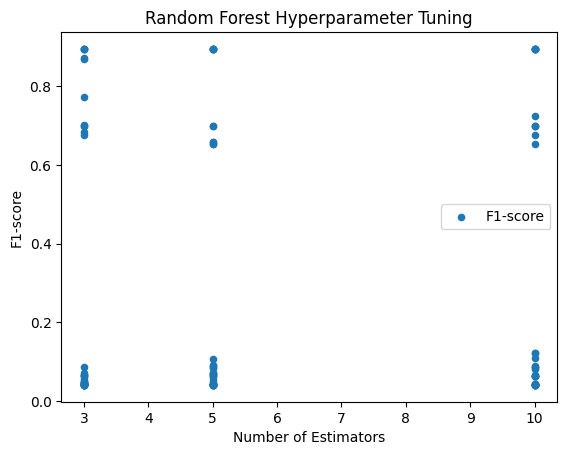

  param_n_estimators param_max_depth param_min_samples_split  \
0                 10               5                      20   
1                  5               5                      10   
2                  5               5                       5   
3                 10               5                       5   
4                  5               5                      10   
5                 10               5                      10   
6                  3               5                      20   
7                  5               5                      20   
8                 10               5                      20   
9                  3               5                       5   

  param_min_samples_leaf param_max_features  mean_test_score  
0                      4               None         0.894575  
1                      4               None         0.894575  
2                      2               None         0.894575  
3                      2               None

C:\Users\chinm\AppData\Local\Temp\ipykernel_26380\1918879850.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table.sort_values(by='mean_test_score', ascending=False, inplace=True)


In [16]:
# Get the results from the GridSearchCV object
cv_results = pd.DataFrame(grid_search.cv_results_)

# Display the first few rows of the results
print(cv_results.head())

# Plot the F1-score for each hyperparameter combination
plt.figure(figsize=(10, 6))
cv_results.plot(x='param_n_estimators', y='mean_test_score', kind='scatter', label='F1-score')
plt.xlabel('Number of Estimators')
plt.ylabel('F1-score')
plt.title('Random Forest Hyperparameter Tuning')
plt.legend()
plt.show()

# Create a table with hyperparameters and F1-scores
table = cv_results[['param_n_estimators', 'param_max_depth', 'param_min_samples_split',
                    'param_min_samples_leaf', 'param_max_features', 'mean_test_score']]
table.sort_values(by='mean_test_score', ascending=False, inplace=True)
table.reset_index(drop=True, inplace=True)
print(table.head(10))

In [ ]:
# Load the dataset
data = pd.read_csv('test.csv')
data.drop('Candidate', axis=1, inplace=True)

def convert_to_numeric(value):
    if pd.isna(value):
        return 0
    elif 'Crore+' in value:
        return int(value.replace(' Crore+', '')) * 10000000
    elif 'Lac+' in value:
        return int(value.replace(' Lac+', '')) * 100000
    elif 'Thou+' in value:
        return int(value.replace(' Thou+', '')) * 1000
    elif 'Hund+' in value:
        return int(value.replace(' Hund+', '')) * 100
    else:
        return int(value)

data['Total Assets'] = data['Total Assets'].apply(convert_to_numeric)
data['Liabilities'] = data['Liabilities'].apply(convert_to_numeric)



# # Feature Engineering
# # Create a new feature 'net_worth'
# data['net_worth'] = data['Total Assets'] - data['Liabilities']


In [ ]:
# Encode categorical features
categorical_cols = ['Constituency ∇', 'Party', 'state']
one_hot_encoder = OneHotEncoder(sparse=False)
data_categorical = one_hot_encoder.fit_transform(data[categorical_cols])
data_numerical = data.drop(categorical_cols, axis=1)
X = np.concatenate((data_numerical, data_categorical), axis=1)
